In [11]:
import pandas as pd

# Assuming df_long has columns 'Country Name', 'Indicator Name', 'Year', 'Value'

data = pd.read_csv('D:/BDA_Sem_2/MLBD/MLBD Lab/Datasets/archive/API_8_DS2_en_csv_v2_3654.csv', skiprows=4)

# Fill the missing values from columns 1960 to 2023 with median of the respective column
years = data.columns[4:]
for year in years:
    data[year] = data[year].fillna(data[year].median())
data.head()

C:\Users\MSIS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Unmet need for contraception (% of married wom...,SP.UWT.TFRT,13.070166,12.67028,12.693871,12.868832,13.030794,13.48017,...,17.672304,17.0,17.148692,17.044352,17.750586,18.061364,19.548614,17.208476,9.327641,NaN
1,Aruba,ABW,Completeness of death registration with cause-...,SP.REG.DTHS.ZS,13.070166,12.67028,12.693871,12.868832,13.030794,13.48017,...,17.672304,17.0,17.148692,17.044352,17.750586,18.061364,19.548614,17.208476,9.327641,NaN
2,Aruba,ABW,Completeness of birth registration (%),SP.REG.BRTH.ZS,13.070166,12.67028,12.693871,12.868832,13.030794,13.48017,...,17.672304,17.0,17.148692,17.044352,17.750586,18.061364,19.548614,17.208476,9.327641,NaN
3,Aruba,ABW,"Completeness of birth registration, urban (%)",SP.REG.BRTH.UR.ZS,13.070166,12.67028,12.693871,12.868832,13.030794,13.48017,...,17.672304,17.0,17.148692,17.044352,17.750586,18.061364,19.548614,17.208476,9.327641,NaN
4,Aruba,ABW,"Completeness of birth registration, rural (%)",SP.REG.BRTH.RU.ZS,13.070166,12.67028,12.693871,12.868832,13.030794,13.48017,...,17.672304,17.0,17.148692,17.044352,17.750586,18.061364,19.548614,17.208476,9.327641,NaN


In [12]:
# Filter out non-country/indicator related columns, as the dataset seems to include metadata columns
# Assuming the first few columns include country names, indicator names, and years
columns_of_interest = ['Country Name', 'Indicator Name'] + [str(year) for year in range(1960, 2024)]  # Update year range
dataset_clean = data[columns_of_interest]

# Reshape the dataset into a long format
df_long = dataset_clean.melt(id_vars=['Country Name', 'Indicator Name'], var_name='Year', value_name='Value')

# Ensure 'Year' is numeric
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')

# Drop any rows with missing data
df_long = df_long.dropna()

# Filter data for a specific country (example: United States)
country_name = "United States"  # Change this to the country you're interested in
df_country = df_long[df_long['Country Name'] == country_name]

# Pivot the data: years as index, indicator names as columns, values as the data
df_pivot = df_country.pivot_table(index='Year', columns='Indicator Name', values='Value')

# Check the shape and preview the df_pivot
print(df_pivot.shape)
print(df_pivot.head())

(64, 254)
Indicator Name  ARI treatment (% of children under 5 taken to a health provider)  \
Year                                                                               
1960                                                    13.070166                  
1961                                                    12.670280                  
1962                                                    12.693871                  
1963                                                    12.868832                  
1964                                                    13.030794                  

Indicator Name  Adolescent fertility rate (births per 1,000 women ages 15-19)  \
Year                                                                            
1960                                                       88.011               
1961                                                       87.006               
1962                                                       80.034            

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming df_pivot is ready and has the shape (years, indicators)

# Choose the indicator you want to predict (e.g., 'GDP')
target_indicator = 'Domestic general government health expenditure (% of GDP)'  # Replace with your target indicator

# Set up the features (all other indicators) and the target
X = df_pivot.drop(columns=[target_indicator])  # Drop the target indicator from the features
y = df_pivot[target_indicator]  # The target is the 'GDP' column (or any other indicator)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (Optional but recommended for many models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the model (Linear Regression)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Show the coefficients (how much each feature is contributing)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Mean Squared Error (MSE): 1.9634121475215596
                                                    Coefficient
Indicator Name                                                 
ARI treatment (% of children under 5 taken to a...    -0.001869
Adolescent fertility rate (births per 1,000 wom...    -0.025013
Adults (ages 15+) and children (ages 0-14) newl...    -0.001869
Adults (ages 15-49) newly infected with HIV           -0.010177
Age dependency ratio (% of working-age population)     0.010187
...                                                         ...
Women who believe a husband is justified in bea...    -0.001869
Women who were first married by age 15 (% of wo...    -0.001869
Women who were first married by age 18 (% of wo...    -0.001869
Women's share of population ages 15+ living wit...    -0.037524
Young people (ages 15-24) newly infected with HIV     -0.001179

[253 rows x 1 columns]


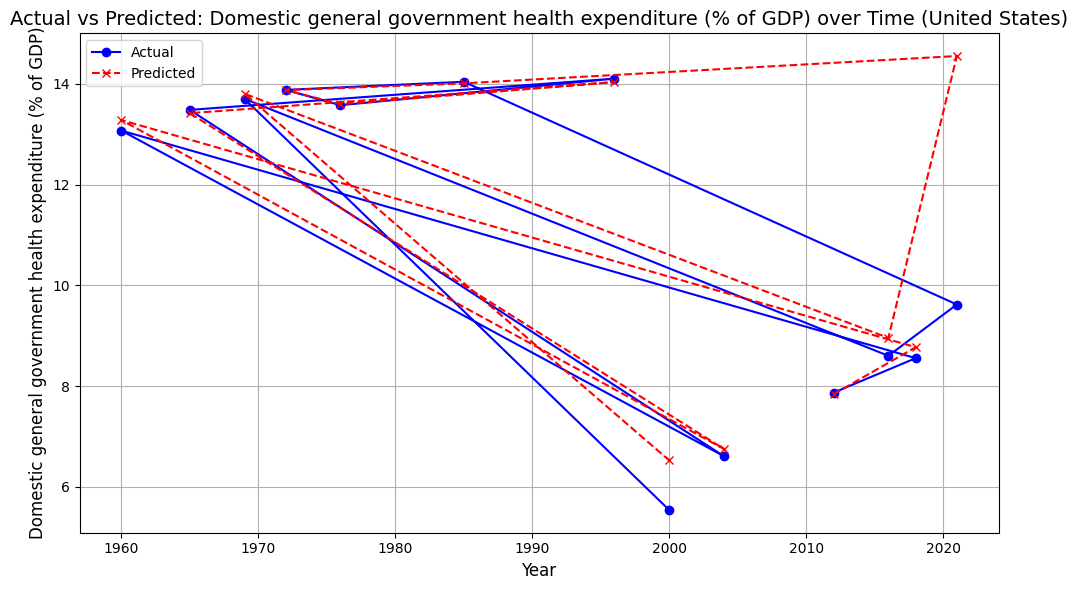

In [15]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values for the test set
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_test.index, y_test, label='Actual', color='blue', marker='o')

# Plot predicted values
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--', marker='x')

# Adding labels and title
plt.title(f'Actual vs Predicted: {target_indicator} over Time (United States)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel(target_indicator, fontsize=12)

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


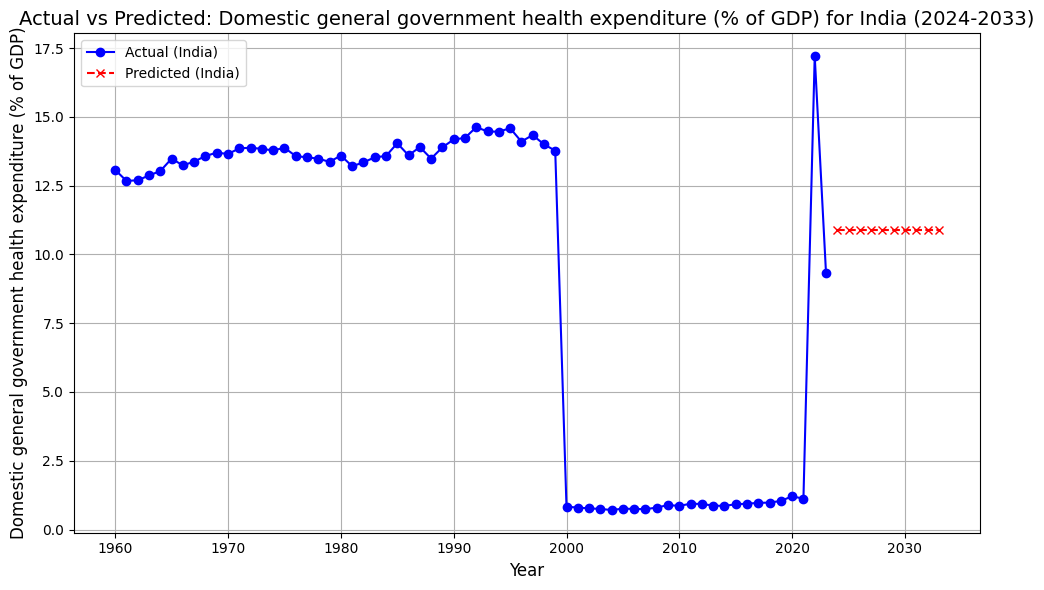

   Year  Domestic general government health expenditure (% of GDP)
0  2024                                          10.901868        
1  2025                                          10.901868        
2  2026                                          10.901868        
3  2027                                          10.901868        
4  2028                                          10.901868        
5  2029                                          10.901868        
6  2030                                          10.901868        
7  2031                                          10.901868        
8  2032                                          10.901868        
9  2033                                          10.901868        


In [16]:
import numpy as np

# Filter the data for India
df_india = df_long[df_long['Country Name'] == 'India']

# Pivot the data for India (similar to what we did for the US)
df_india_pivot = df_india.pivot_table(index='Year', columns='Indicator Name', values='Value')

# Prepare the features (indicators) and the target
X_india = df_india_pivot.drop(columns=[target_indicator])
y_india = df_india_pivot[target_indicator]

# Scale the data for prediction (use the same scaler used for training)
X_india_scaled = scaler.transform(X_india)

# Predict the target indicator for the next 10 years (2024 to 2033)
future_years = np.arange(2024, 2034)
X_future = X_india_scaled[-1].reshape(1, -1)  # Use the last known values to predict future

# Extend X for the next 10 years by repeating the last year's values
X_future_repeated = np.tile(X_future, (10, 1))

# Predict future values
y_future_pred = model.predict(X_future_repeated)

# Create a DataFrame for the predictions
df_future = pd.DataFrame({
    'Year': future_years,
    target_indicator: y_future_pred
})

# Plot the historical and predicted values
plt.figure(figsize=(10, 6))

# Plot historical data (India's data)
plt.plot(df_india_pivot.index, y_india, label='Actual (India)', color='blue', marker='o')

# Plot future predictions (next 10 years)
plt.plot(df_future['Year'], df_future[target_indicator], label='Predicted (India)', color='red', linestyle='--', marker='x')

# Adding labels and title
plt.title(f'Actual vs Predicted: {target_indicator} for India (2024-2033)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel(target_indicator, fontsize=12)

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the predicted future values
print(df_future)

Top 5 countries with the highest predicted GDP growth (2024-2033):
Afghanistan: 205.17%
Myanmar: 50.95%
Namibia: 10.41%
Mozambique: 9.55%
Netherlands: 9.30%


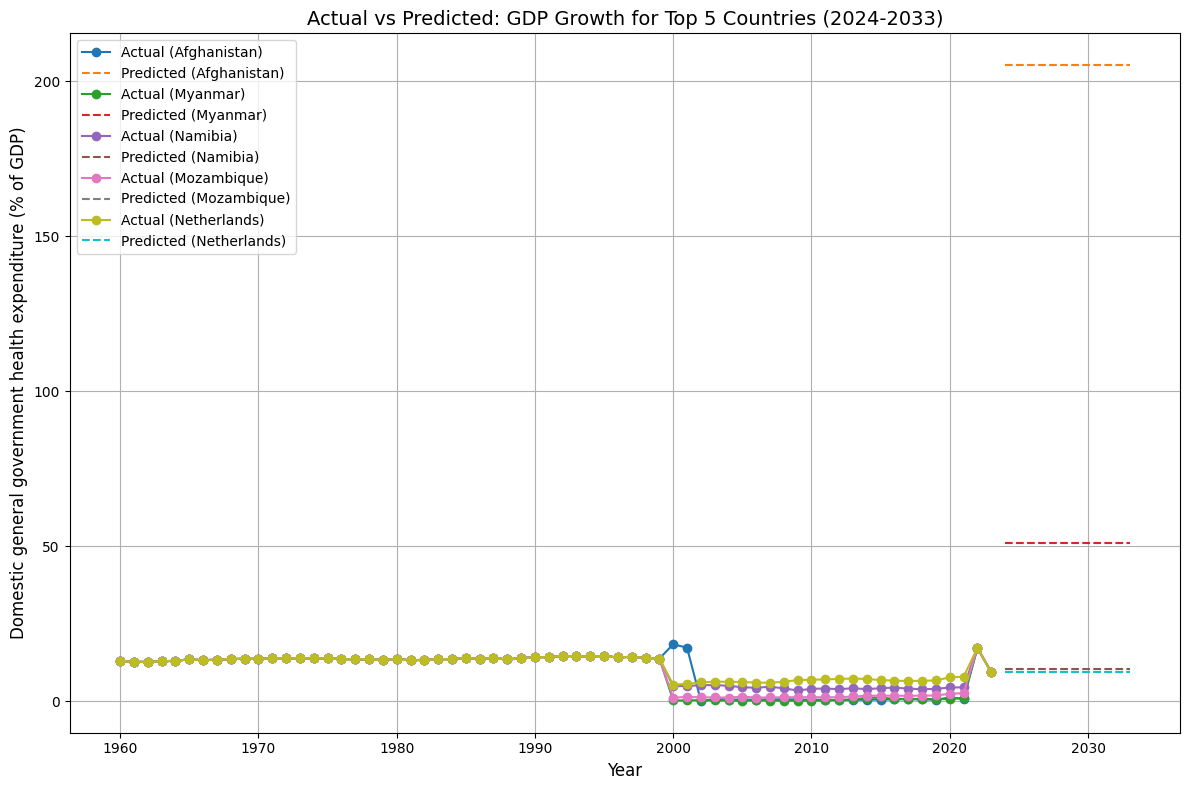

In [23]:
# Step 1: Identify the GDP growth indicator
gdp_growth_indicator = 'Domestic general government health expenditure (% of GDP)'

# Step 2: Initialize a dictionary to store predicted GDP growth for each country
country_growth_predictions = {}

# Step 3: Predict future GDP growth for the top 10 countries
for country in top_10_countries:
    # Filter the data for the current country
    df_country = df_long[df_long['Country Name'] == country]

    # Pivot the data for the country
    df_country_pivot = df_country.pivot_table(index='Year', columns='Indicator Name', values='Value')

    # Prepare the features and the target (GDP growth indicator)
    X_country = df_country_pivot.drop(columns=[gdp_growth_indicator])
    y_country = df_country_pivot[gdp_growth_indicator]

    # Scale the data for prediction (use the same scaler as for training)
    X_country_scaled = scaler.transform(X_country)

    # Predict the GDP growth for the next 10 years (2024 to 2033)
    X_future = X_country_scaled[-1].reshape(1, -1)  # Use the last known values to predict future
    X_future_repeated = np.tile(X_future, (10, 1))  # Repeat the last known values for 10 years

    # Predict future values
    y_future_pred = model.predict(X_future_repeated)

    # Calculate the average predicted GDP growth over the next 10 years
    avg_gdp_growth = y_future_pred.mean()

    # Store the prediction in the dictionary
    country_growth_predictions[country] = avg_gdp_growth

# Step 4: Identify the top 5 countries with the maximum GDP growth
top_5_gdp_growth = sorted(country_growth_predictions.items(), key=lambda x: x[1], reverse=True)[:5]

# Step 5: Optionally, display the top 5 countries with their average GDP growth predictions
print("Top 5 countries with the highest predicted GDP growth (2024-2033):")
for country, growth in top_5_gdp_growth:
    print(f"{country}: {growth:.2f}%")

# Step 6: Plot the actual vs predicted GDP growth for the top 5 countries
plt.figure(figsize=(12, 8))

for country, _ in top_5_gdp_growth:
    # Filter the data for the current country
    df_country = df_long[df_long['Country Name'] == country]

    # Pivot the data for the country
    df_country_pivot = df_country.pivot_table(index='Year', columns='Indicator Name', values='Value')

    # Prepare the features and the target
    X_country = df_country_pivot.drop(columns=[gdp_growth_indicator])
    y_country = df_country_pivot[gdp_growth_indicator]

    # Scale the data for prediction (use the same scaler as for training)
    X_country_scaled = scaler.transform(X_country)

    # Predict the GDP growth for the next 10 years (2024 to 2033)
    X_future = X_country_scaled[-1].reshape(1, -1)  # Use the last known values to predict future
    X_future_repeated = np.tile(X_future, (10, 1))  # Repeat the last known values for 10 years

    # Predict future values
    y_future_pred = model.predict(X_future_repeated)

    # Create a DataFrame for the predictions
    df_future = pd.DataFrame({
        'Year': np.arange(2024, 2034),
        gdp_growth_indicator: y_future_pred
    })

    # Plot historical data (actual values) for the country
    plt.plot(df_country_pivot.index, y_country, label=f'Actual ({country})', marker='o')

    # Plot future predictions (next 10 years)
    plt.plot(df_future['Year'], df_future[gdp_growth_indicator], label=f'Predicted ({country})', linestyle='--')

# Step 7: Adding labels and title
plt.title(f'Actual vs Predicted: GDP Growth for Top 5 Countries (2024-2033)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel(gdp_growth_indicator, fontsize=12)

# Show legend
plt.legend(loc='best')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()